1. Przygotuj	aplikację,	która	pozwoli	na	wygenerowanie	wartości	skrótu	zapisanego	
szesnastkowo	na	podstawie	tekstowego	wejścia,	zadanego	przez	użytkownika.	
Skorzystaj	z	bibliotek	natywnie	dostępnych	w	wybranym	środowisku	
programistycznym.	Uwzględnij	funkcje	skrótu	MD5,	SHA-1,	wszystkie	warianty	
SHA-2	oraz	SHA-3.	
2. Porównaj	szybkość	działania	poszczególnych	funkcji	oraz	długość	ciągów	
wyjściowych.	Użyj	zbioru	danych	wejściowych	o	zróżnicowanej	długości.	

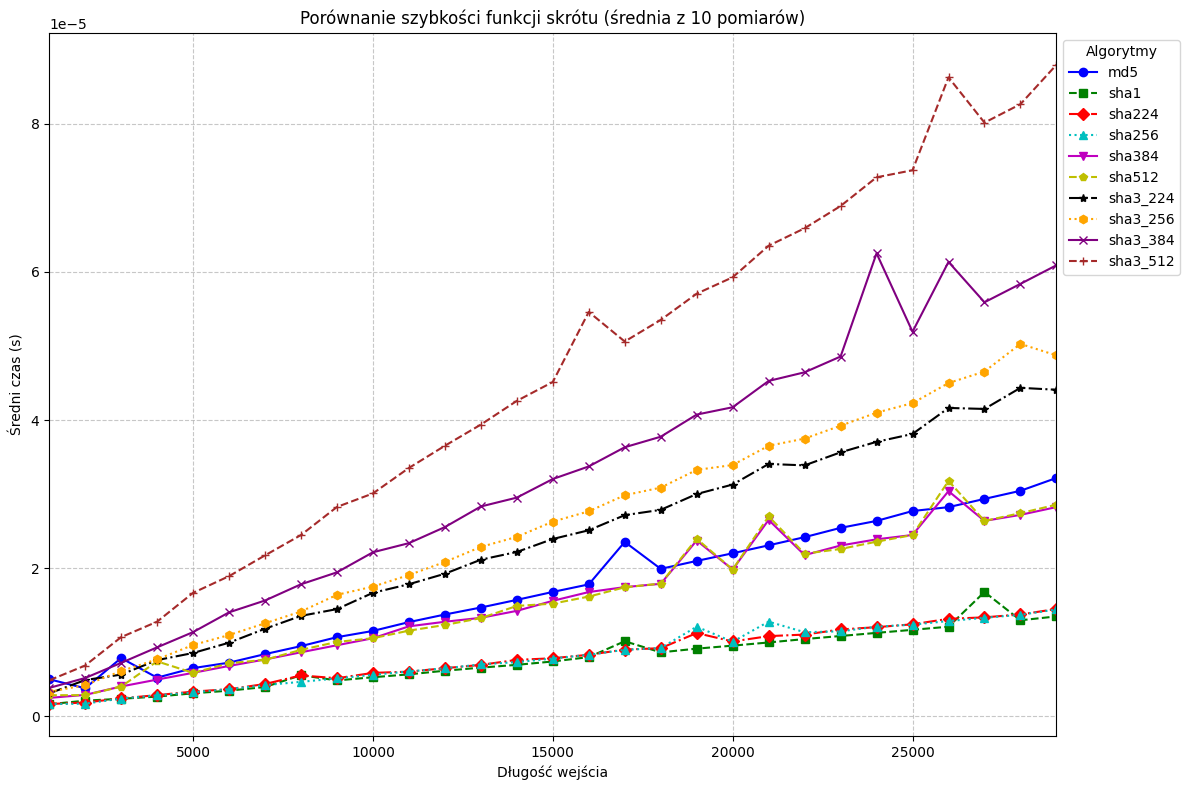

In [5]:
import hashlib
import time
import matplotlib.pyplot as plt

# Funkcja generująca hash
def generate_hash(input_text, algorithm):
    hash_object = hashlib.new(algorithm)
    hash_object.update(input_text.encode('utf-8'))
    return hash_object.hexdigest()

# Funkcja mierząca czas generowania hash
def measure_time_avg(input_text, algorithm, repetitions):
    total_time = 0
    for _ in range(repetitions):
        start_time = time.time()
        generate_hash(input_text, algorithm)
        end_time = time.time()
        total_time += (end_time - start_time)
    return total_time / repetitions  # Zwraca średni czas


# Generowanie danych
inputs = {}


# Zakres 100-1500 co 100
for i in range(1000, 30000, 1000):
    inputs[str(i)] = "a" * i

# Lista algorytmów
algorithms = ['md5', 'sha1', 'sha224', 'sha256', 'sha384', 'sha512', 'sha3_224', 'sha3_256', 'sha3_384', 'sha3_512']


# Wyniki czasów
results = {alg: [] for alg in algorithms}

# Mierzenie czasów dla każdego algorytmu i długości wejścia
for length, text in inputs.items():
    for alg in algorithms:
        avg_time = measure_time_avg(text, alg, 30) 
        results[alg].append(avg_time)

# Generowanie wykresów
plt.figure(figsize=(12, 8))
input_lengths = [int(length) for length in inputs.keys()]  # Konwersja kluczy na liczby

# Definicja stylów linii i znaczników
styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'h', 'x', '+']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Iteracja po algorytmach i przypisanie stylów
for idx, (alg, times) in enumerate(results.items()):
    style = styles[idx % len(styles)]  # Styl linii (cyklicznie)
    marker = markers[idx % len(markers)]  # Znacznik (cyklicznie)
    color = colors[idx % len(colors)]  # Kolor (cyklicznie)
    plt.plot(input_lengths, times, label=alg, linestyle=style, marker=marker, color=color)

plt.title("Porównanie szybkości funkcji skrótu (średnia z 10 pomiarów)")
plt.xlabel("Długość wejścia")
plt.ylabel("Średni czas (s)")
plt.legend(title="Algorytmy", loc="upper left", bbox_to_anchor=(1, 1))  # Legenda poza wykresem
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Automatyczne dopasowanie elementów
plt.xlim(min(input_lengths), max(input_lengths))  # Zakres osi X
plt.show()

 Wygeneruj	skrót	dla	słowa	wejściowego,	nie	dłuższego	niż	4	znaki.	Skopiuj	
wartość	uzyskaną	dla	funkcji	MD5	i	sprawdź,	czy	wartość	wejściowa	jest	
powszechnie	znana.	Co	można	powiedzieć	o	bezpieczeństwie	skrótów	z	krótkich	
haseł	składowanych	w	bazach	danych?

In [4]:
import hashlib

# Wprowadzenie słowa wejściowego
input_text = input("Podaj słowo wejściowe (maks. 4 znaki): ")
if len(input_text) > 4:
    print("Słowo wejściowe nie może być dłuższe niż 4 znaki.")
else:
    # Generowanie skrótu MD5
    md5_hash = hashlib.md5(input_text.encode('utf-8')).hexdigest()
    print(f"Skrót MD5 dla '{input_text}': {md5_hash}")



Skrót MD5 dla 'abcd': e2fc714c4727ee9395f324cd2e7f331f


Krótkie hasła są podatne na ataki typu bruteforce, występują kolizje. 
md5 wykonuje się bardzo szybko, co zwiększa podatność na bruteforce.

Jednocześnie funkcje skróto są krótkie, co zwiększa szanse na kolizje.

Większość ciągów które wprowadziłem była znana

4. Na	podstawie	powszechnie	dostępnych	źródeł	odpowiedz	na	pytanie	–	czy	
funkcję	MD5	można	uznać	za	bezpieczną?	Czy	dotychczas	zostały	znalezione	dla	
niej	jakiekolwiek	kolizje?	

Kolizje wysępują, atakujący może stworzyć dwa różne pliki, które mają ten sam skrót MD5, co jest niebezpeiczne.



In [118]:
import hashlib
import random
import string

def generate_random_string(length=8):
    """Generuje losowy ciąg znaków o zadanej długości."""
    return ''.join(random.choices(string.ascii_letters + string.digits, k=length))

def get_first_12_bits(hash_hex):
    """Zwraca pierwsze 12 bitów skrótu w postaci binarnej."""
    hash_binary = bin(int(hash_hex, 16))[2:].zfill(len(hash_hex) * 4)
    # return hash_binary[:12]
    return hash_binary[:32]

def find_collision(algorithm, max_attempts=100000):
    """Znajduje kolizję na pierwszych 12 bitach dla danego algorytmu."""
    seen_hashes = {}
    for attempt in range(1, max_attempts + 1):  # Licznik prób zaczyna się od 1
        random_input = generate_random_string()
        hash_object = hashlib.new(algorithm)
        hash_object.update(random_input.encode('utf-8'))
        hash_hex = hash_object.hexdigest()
        first_12_bits = get_first_12_bits(hash_hex)
        
        if first_12_bits in seen_hashes:
            return {
                "collision_found": True,
                "attempts": attempt  # Dodanie liczby prób
            }
        seen_hashes[first_12_bits] = random_input
    return {"collision_found": False, "attempts": max_attempts}

# Eksperyment: 10 powtórzeń dla każdego algorytmu
algorithms = ['md5', 'sha256', 'sha3_256']
n = 200  # Liczba powtórzeń
results = {alg: [] for alg in algorithms}

for alg in algorithms:
    print(f"\nEksperyment dla algorytmu: {alg}")
    for i in range(n):
        result = find_collision(alg)
        if result["collision_found"]:
            print(f"Powtórzenie {i + 1}: Kolizja znaleziona po {result['attempts']} próbach.")
            results[alg].append(result["attempts"])
        else:
            print(f"Powtórzenie {i + 1}: Nie znaleziono kolizji w zadanej liczbie prób.")

# Obliczanie średniej liczby prób
print("\nŚrednie liczby prób dla każdego algorytmu:")
for alg, attempts in results.items():
    if attempts:
        avg_attempts = sum(attempts) / len(attempts)
        print(f"{alg}: Średnia liczba prób = {avg_attempts:.2f}")
    else:
        print(f"{alg}: Nie znaleziono kolizji w żadnym z {n} powtórzeń.")


Eksperyment dla algorytmu: md5
Powtórzenie 1: Kolizja znaleziona po 99767 próbach.
Powtórzenie 2: Kolizja znaleziona po 81276 próbach.
Powtórzenie 3: Kolizja znaleziona po 27293 próbach.
Powtórzenie 4: Nie znaleziono kolizji w zadanej liczbie prób.
Powtórzenie 5: Kolizja znaleziona po 23221 próbach.
Powtórzenie 6: Kolizja znaleziona po 31449 próbach.
Powtórzenie 7: Kolizja znaleziona po 68118 próbach.
Powtórzenie 8: Nie znaleziono kolizji w zadanej liczbie prób.
Powtórzenie 9: Nie znaleziono kolizji w zadanej liczbie prób.
Powtórzenie 10: Nie znaleziono kolizji w zadanej liczbie prób.
Powtórzenie 11: Kolizja znaleziona po 85818 próbach.
Powtórzenie 12: Nie znaleziono kolizji w zadanej liczbie prób.
Powtórzenie 13: Kolizja znaleziona po 45927 próbach.
Powtórzenie 14: Nie znaleziono kolizji w zadanej liczbie prób.
Powtórzenie 15: Kolizja znaleziona po 73402 próbach.
Powtórzenie 16: Nie znaleziono kolizji w zadanej liczbie prób.
Powtórzenie 17: Kolizja znaleziona po 20277 próbach.
Powtór

Wszystkie funkcje skrótu powinny generować losowe wartości w tym zakresie. Dlatego nawet dla 30 bitów wyniki to
md5: Średnia liczba prób = 39862.39
sha256: Średnia liczba prób = 40823.37
sha3_256: Średnia liczba prób = 39702.93

In [ ]:
# //  Losowość	wyjścia	funkcji	skrótu	(kryterium	SAC	–	Strict	Avalanche	Criteria)	–	
# przy	zmianie	pojedynczego	bitu	na	wejściu,	wszystkie	bity	wyjściowe	powinny	
# zmienić	się	z	prawdopodobieństwem	0,5	każdy.	Dla	wybranej	funkcji	skrótu	
# zbadaj	tę	własność.	


import hashlib
import random

def flip_bit(input_text, bit_index):
    """Zmienia jeden bit w ciągu wejściowym."""
    byte_index = bit_index // 8
    bit_in_byte = bit_index % 8
    byte_array = bytearray(input_text.encode('utf-8'))
    byte_array[byte_index] ^= (1 << bit_in_byte)
    return byte_array.decode('utf-8', errors='ignore')

def count_changed_bits(hash1, hash2):
    """Zlicza liczbę zmienionych bitów między dwoma skrótami."""
    bin1 = bin(int(hash1, 16))[2:].zfill(len(hash1) * 4)
    bin2 = bin(int(hash2, 16))[2:].zfill(len(hash2) * 4)
    return sum(b1 != b2 for b1, b2 in zip(bin1, bin2))

def test_sac(algorithm, input_text, n):
    """Testuje kryterium SAC dla danego algorytmu i wejścia."""
    hash_object = hashlib.new(algorithm)
    hash_object.update(input_text.encode('utf-8'))
    original_hash = hash_object.hexdigest()
    
    total_changed_bits = 0
    hash_length = len(original_hash) * 4  # Długość skrótu w bitach
    
    for _ in range(n):
        bit_to_flip = random.randint(0, len(input_text) * 8 - 1)
        modified_input = flip_bit(input_text, bit_to_flip)
        
        hash_object = hashlib.new(algorithm)
        hash_object.update(modified_input.encode('utf-8'))
        modified_hash = hash_object.hexdigest()
        
        changed_bits = count_changed_bits(original_hash, modified_hash)
        total_changed_bits += changed_bits
    
    avg_changed_bits = total_changed_bits / n
    return avg_changed_bits, avg_changed_bits / hash_length

# Testowanie dla MD5, SHA-256 i SHA3-256
algorithms = ['md5', 'sha256', 'sha3_256']
input_text = "inne wejscie, jeszcze dluzsze, a nawet bardzo bardzo dlugie" + 'a' * 100  # Przykładowe wejście
n = 1000  # Liczba powtórzeń

for alg in algorithms:
    avg_changed_bits, probability = test_sac(alg, input_text, n)
    print(f"Algorytm: {alg}")
    print(f"Liczba powtórzeń: {n}")
    print(f"Średnia liczba zmienionych bitów: {avg_changed_bits:.4f}")
    print(f"Prawdopodobieństwo zmiany bitu: {probability:.4f}")
    print("-" * 40)


Algorytm: md5
Liczba powtórzeń: 1000
Średnia liczba zmienionych bitów: 63.5790
Prawdopodobieństwo zmiany bitu: 0.4967
----------------------------------------
Algorytm: sha256
Liczba powtórzeń: 1000
Średnia liczba zmienionych bitów: 127.9350
Prawdopodobieństwo zmiany bitu: 0.4997
----------------------------------------
Algorytm: sha3_256
Liczba powtórzeń: 1000
Średnia liczba zmienionych bitów: 128.7010
Prawdopodobieństwo zmiany bitu: 0.5027
----------------------------------------


wnioski z powyższego eksperymentu - wahania dla md5 wystąpują częściej i są większe, co oddaje niższą jakość dla testu SAC

Dzięki dodaniu soli każde hasło ma unikalny hash, nawet jeśli jest takie samo jak inne. To uniemożliwia skuteczne użycie tablic znanych haseł.

Są metody na generowanie kolizji w md5, co w połączeniu z szybkością generowania wyników i jedynie 128 bitami skrótu powoduje zagrożenie atakami typu breachforce